# Carga de librerías

In [12]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle
from nltk import FreqDist

from random import choice
import re

In [2]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Listado de Funciones

In [4]:
# Conversión de texto en formato NLTK para análisis específicos

def conv_nltk(list):
    tokens = nltk.word_tokenize(str(list))
    return(nltk.Text(tokens))

In [11]:
# Visualización de filtrado y términos más frecuentes. 
## Longitud máxima de 5

def Filter_FreQ_plot(list):
    dict = {}
    for word, value in list.items():
        if word in stopwords:
            pass
        elif len(word) < 5:
            pass
        else:
            dict[word] = value
    plot_dict = FreqDist(dict)
    plot_dict.plot(20, cumulative = True)

In [6]:
# Eliminar duplicados y espacios en blanco

def duplicated(list): 
    temp = []
    for sentence in list:
        new_sentence = sentence.split() 
        new_sentece_join = ' '.join(new_sentence)
        if new_sentece_join not in temp: 
            temp.append(new_sentece_join)
    temp.pop(0)
    return(temp)

# Inicio


In [7]:
# Carga de las listas binarizadas

Flagged_basic = pickle.load(open("./Flagged_basic.p", "rb" ))
NotFlagged_basic = pickle.load(open("./NotFlagged_basic.p", "rb" ))

In [8]:
print("Verificación de la carga correcta de los datos de la etiqueta 'flagged' ")
print("Tamaño de la lista:", len(Flagged_basic))
print("Muestra")
Flagged_basic[:10]

Verificación de la carga correcta de los datos de la etiqueta 'flagged' 
Tamaño de la lista: 227
Muestra


['after a few day i manage to talk she down',
 'alcoholic',
 'alone anything',
 'also be there to help try and talk he down',
 'also help try talk',
 'always',
 'always listen',
 'and give she the advice she need to hear',
 'and have a very low self esteem',
 'and promise he that i would go through everything with he']

In [9]:
print("Verificación de la carga correcta de los datos de la etiqueta 'not_flagged' ")
print("Tamaño de la lista:", len(NotFlagged_basic))
print("Muestra")
NotFlagged_basic[:10]

Verificación de la carga correcta de los datos de la etiqueta 'not_flagged' 
Tamaño de la lista: 243
Muestra


['i can not think of one really',
 'i think i may have indirectly',
 'only really one who do not fit into the any of the above category',
 'her therapist call it spiral',
 'anyway she pretty much call i any time she be frustrate by something with',
 'her boyfriend to ask i if it be logical or not',
 'before they would just fight and he would call she crazy',
 'now she ask i if it be ok he do not say please when he say hand',
 'i the remote',
 'a couple of year ago my be go to switch school because of low']

# Aumento de data - previo

Se hará el aumento de la data en la etiqueta "Flagged" con este método, ya que es la que tiene características más precisas que queremos resaltar y reforzar.

Lo principal, es saber cuáles son los términos más relevantes y su frecuencia.

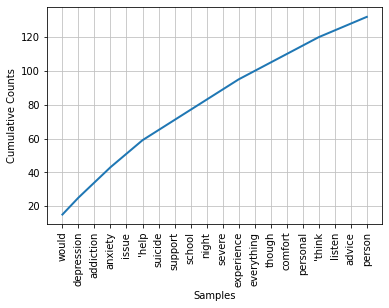

In [13]:
# Llamado de la función para convertir las cadenas de texto en formato NLTK 
## y usar algunas de sus herramientas. 

Flagged_nltk = conv_nltk(str(Flagged_basic))
FreQ_Flagged = FreqDist(Flagged_nltk)
Filter_FreQ_plot(FreQ_Flagged)

Se puede apreciar palabras como adicction, depresion, ansiedad, suicidio, mental son las más frecuentes:

* ¿En cuál contexto aparecen? 
* ¿Cuáles otras maneras hay de referirnos a estos términos? 

Se hará uso del método "concordance" y "similar" sobre la lista en formato NLTK para conocer un poco más del contexto.

In [14]:
Flagged_nltk.concordance("depression")

Displaying 10 of 10 matches:
al ' , 'ex cuttersuicidal ' , 'ex depression anxiety ' , 'ex have depression a
x depression anxiety ' , 'ex have depression and anxiety ' , 'face ' , 'face s
 'go and hang out with he ' , 'go depression anxiety ' , 'go hang ' , 'go peri
, 'go hang ' , 'go period intense depression make sure ' , 'go rehab month cle
, 'good diagnose anxiety disorder depression ' , 'good mom past away ode grade
 grade ' , 'grandmother go severe depression shortly difficulty ' , 'have self
r anything ' , 'having go through depression and anxiety myself ' , 'he be in 
be go through a period of intense depression and i make sure that ' , 'my deal
iagnose with anxiety disorder and depression ' , 'my grandmother go through so
randmother go through some severe depression shortly after i have some difficu


In [15]:
Flagged_nltk.concordance("anxiety")

Displaying 9 of 9 matches:
vere ' , 'day manage talk ' , 'deal anxiety desire everything life ' , 'depress
x cuttersuicidal ' , 'ex depression anxiety ' , 'ex have depression and anxiety
anxiety ' , 'ex have depression and anxiety ' , 'face ' , 'face similar issue t
hang out with he ' , 'go depression anxiety ' , 'go hang ' , 'go period intense
rvival help make ' , 'good diagnose anxiety disorder depression ' , 'good mom p
, 'having go through depression and anxiety myself ' , 'he be in the psych ward
 i make sure that ' , 'my deal with anxiety and this desire for everything in h
other ' , 'my good be diagnose with anxiety disorder and depression ' , 'my gra
et super depressed ' , 'y deal with anxiety and this desire for everything in h


In [16]:
Flagged_nltk.concordance("suicide")

Displaying 6 of 6 matches:
d kindness of a ' , 'be think about suicide ' , 'big addiction issue ' , 'blow 
ffer as a result ' , 'i save a from suicide once ' , 'i share my experience wit
rough death and loss of a ' , 'save suicide ' , 'self harm past ' , 'share expe
he addiction ' , 'she try to commit suicide ' , 'shit year early mind ' , 'simp
think see look addiction ' , 'think suicide ' , 'though addiction define person
ction define person ' , 'try commit suicide ' , 'try good entire time throughou


In [17]:
Flagged_nltk.concordance("addiction")

Displaying 9 of 9 matches:
talk to i about ' , 'as though her addiction define she as a person ' , 'basica
, 'be think about suicide ' , 'big addiction issue ' , 'blow over what i say be
ty ' , 'my now use to have serious addiction trouble before we start date and f
, 'one want oh ok ' , 'open mental addiction weed ' , 'or peace in the turmoil 
l see when they look at she be the addiction ' , 'she try to commit suicide ' ,
late help like ' , 'think see look addiction ' , 'think suicide ' , 'though add
ion ' , 'think suicide ' , 'though addiction define person ' , 'try commit suic
ate share use get ' , 'use serious addiction trouble start date feel ' , 'visit
ven though still ' , 'who have big addiction issue ' , 'would go girl get super


In [18]:
Flagged_nltk.concordance("death")

Displaying 2 of 2 matches:
k ' , 'remind alone ' , 'roommate go death loss ' , 'roommate when he be go thr
 ' , 'roommate when he be go through death and loss of a ' , 'save suicide ' , 


In [19]:
Flagged_nltk.similar("depression")

it death


In [20]:
Flagged_nltk.similar("anxiety")

i she cancer


In [21]:
Flagged_nltk.collocations()

either way; 'basically treat; 'huge douche; 'make laugh; 'simply
bring; almost every; bring supportive; completely isolate; die inside;
doc together; drug cocaine; hard drug; house part; important
listening; nobody else; slowly die; tunnel switch; alcoholic mother;
already take; every day


## Observación:

* Aunque se puede ver el contexto de las cadenas de texto, la palabra en sí misma
está en relación con la clase y no tanto con el contexto; a lo cual se puede preguntar: ¿hay palabras características de la otra clase?

* También, observamos como el método "collocations" resalta pocos bigramas importantes que podamos rescatar.

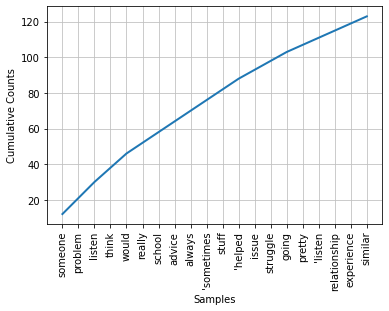

In [22]:
NotFlagged_nltk = conv_nltk(str(NotFlagged_basic))
FreQ_NotFlagged = FreqDist(NotFlagged_nltk)
Filter_FreQ_plot(FreQ_NotFlagged)

Nota: No hay términos característimos de la etiqueta "not_flagged"; por fanto, para el siguiente paso
nos enfocamos en 'depression', 'anxiety', 'death', 'addiction', 'suicide' de la clase "flagged".

# Carga de GloVe

In [33]:
# Download the GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-22 16:24:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-22 16:24:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-22 16:24:46--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [34]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


# Aplicación de GloVe


El algoritmo supervisado GloVe permite obtener palabras con similitudes en diferentes dimensiones; en las cuales se irán 
agrupando según características de los terminos en un espacio de concurrencias estadísticas. 

Se hará uso del archivo disponible en la universidad de Stanford: 
https://nlp.stanford.edu/projects/glove/


In [24]:
# Seleccionar las cadenas de texto de las diferentes palabras. 

list_glove = ['depression', 'anxiety', 'death', 'addiction', 'suicide']

Flagged_GloVe = []

for word in list_glove: 
    for sentence in Flagged_basic:
        if word in sentence.split(): 
            Flagged_GloVe.append(sentence)

In [25]:
# Eliminar las cadenas duplicadas 

Flagged_GloVe = duplicated(Flagged_GloVe)

In [26]:
# Creación de un diccionario a partir del archivo de vectores descargado, 
## en el cual se presenta el término junto con el conjunto de valores de los vectores.

# Debido al tamaño el set de datos y la capacidad de procesamiento, se ha escogido 
## el archivo con 100 dimensiones.

embeddings_dict = {}

with open("./glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [27]:
# Se define una función desde donde se calcula la distancia euclidiana con el algoritmo "spatial"
## de la librería "scipy"

# Fuente: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

A partir del la función "find_closest_embeddings" en la cual a través de una función Lambda se calcula cada distancia respecto de una lista de términos, se procede a conocer los términos más cercanos de las palabras 
solicitada. 

In [28]:
depression = find_closest_embeddings(embeddings_dict["depression"])[1:5]
depression

['illness', 'anxiety', 'onset', 'alcoholism']

In [29]:
anxiety = (find_closest_embeddings(embeddings_dict["anxiety"])[1:5])
anxiety

['nervousness', 'anger', 'paranoia', 'discomfort']

In [30]:
death = (find_closest_embeddings(embeddings_dict["death"])[1:5])
death

['died', 'victim', 'brought', 'brother']

In [31]:
addiction = (find_closest_embeddings(embeddings_dict["addiction"])[1:5])
addiction

['alcoholism', 'addictions', 'addicted', 'addict']

In [32]:
suicide = (find_closest_embeddings(embeddings_dict["suicide"])[1:5])
suicide

['attack', 'attacks', 'bombing', 'bombings']



Observación: Se puede ver que las palabras más cercanas de los términos "suicide" y "death" no tienen relación semántica (al menos para nuestro objetivo final), 
con tanto peso como los otros términos. De igual manera con fines académicos, procedemos a observarlos en una gráfica; aunque luego solo se usará el resultado de los términos "anxiety", "addiction" y "depression"



In [43]:
words = anxiety + addiction + depression + death + suicide


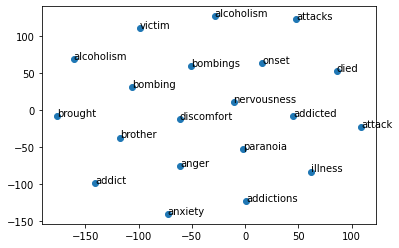

In [44]:
vectors = [embeddings_dict[word] for word in words]

tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vectors[:1000])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

Observación: es interesante cómo se relacionan en dos dimensiones estos términos de la clase "flagged"

In [46]:
flagged_temp = []

# Función para sustituir de manera aleatoria 
## según términos específicos de los seleccionados

def sub_word(index, word_list, sentence_list): 
  temp = []
  for sentence in sentence_list:
    if index in sentence.split():
      word_choice = choice(word_list)
      new_sentence = re.sub(index, word_choice, sentence)
      temp.append(new_sentence)
  return(temp)

In [47]:
flagged_temp.extend(sub_word('depression', depression, Flagged_GloVe))

In [48]:
flagged_temp.extend(sub_word('anxiety', anxiety, Flagged_GloVe))

In [49]:
flagged_temp.extend(sub_word('addiction', addiction, Flagged_GloVe))

In [54]:
Flagged_GloVe_2 = [sentence for sentence in list(flagged_temp) if len(str(sentence.split())) > 4]
print("Muestra de las cadenas de texto ya sustituidas:")
sorted(Flagged_GloVe_2)

Muestra de las cadenas de texto ya sustituidas:


['anxiety girl',
 'as though her addict define she as a person',
 'big addictions issue',
 'deal discomfort desire everything life',
 'ex alcoholism anxiety',
 'ex depression discomfort',
 'ex have depression and paranoia',
 'ex have onset and anxiety',
 'go anxiety anxiety',
 'go depression nervousness',
 'go period intense onset make sure',
 'good diagnose anger disorder depression',
 'good diagnose anxiety disorder illness',
 'grandmother go severe alcoholism shortly difficulty',
 'having go through depression and paranoia myself',
 'having go through illness and anxiety myself',
 'my be go through a period of intense anxiety and i make sure that',
 'my deal with anger and this desire for everything in her life to be',
 'my good be diagnose with anxiety disorder and onset',
 'my good be diagnose with nervousness disorder and depression',
 'my grandmother go through some severe illness shortly after i have some difficulty',
 'my now use to have serious addict trouble before we start 

In [55]:
print("Longitud del la nueva cadena:")
len(Flagged_GloVe_2)

Longitud del la nueva cadena:


30

In [52]:
pickle.dump(Flagged_GloVe_2, open("./Flagged_GloVe.p", "wb" ))

# Observación final: 

* Se puede observar el uso sencillo de términos con más cercanía en el significado según el uso de palabras vectorizadas. 
* Aunque el aumento parezca pequeño, es mayor al 100% del dataset inicial en esta etiqueta con la diferencia de que estás cadenas de textos están optimizadas. 
* Por último paso, las guardamos de modo binarizadas. 